# Exploratory Data Analysis

In [2]:
# import your package
%load_ext autoreload
%autoreload 2
import src

In [3]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.

True

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
import numpy as np
import pandas as pd

from pathlib import Path
from tqdm.auto import tqdm
import logging, os

logging.basicConfig(stream=os.sys.stdout, level=logging.INFO)
logger = logging.getLogger('nb')
logger.setLevel(logging.INFO)

/home/wassname/miniforge3/envs/mori_opt_earnings/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import requests_cache
session = requests_cache.CachedSession('data/interim/.yfinance.cache')
session.headers['User-agent'] = 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'
import yfinance as yf

In [7]:
# Import the backtrader platform
# import backtrader as bt

## data

In [8]:
# path_raw = Path("../data/raw/")
# path_interim = Path("../data/interim/")
# import functools
from bscsi_data.helpers import unlz
from bscsi_data.config import path_raw, path_interim
# from src.data.helpers import unlz as unlz2
# unlz = functools.partial(unlz2, path_raw=path_raw, path_interim=path_interim)

In [9]:
# # The Security Price files (secprdYYYY) contain the price history for the security for the corresponding calendar year. 
# f = Path("../data/raw/optm_lz/secprd/secprd1996.sas7bdat.lz")
# f2=unlz(f)
# reader = pd.read_sas(f2, chunksize=10000 )
# df = next(iter(reader))
# df

In [10]:
# # presumably option names
# f = Path("../data/raw/optm_lz/optionmnames.sas7bdat.lz")
# f2=unlz(f)
# reader = pd.read_sas(f2, chunksize=10000)
# df = next(iter(reader))
# df

In [11]:
# # The Security file (securd) contains identifying information for all equity and index securities known to OptionMetrics. 
# f = Path("../data/raw/optm_lz/securd.sas7bdat.lz")
# f2=unlz(f)
# reader = pd.read_sas(f2, chunksize=10000 )
# df = next(iter(reader))
# df

# get secid

In [12]:
# The Security file (securd) contains identifying information for all equity and index securities known to OptionMetrics. 
f = path_raw /"optm_lz/securd1.sas7bdat.lz"
f2=unlz(f)
df_names = pd.read_sas(f2)
df_names

,secid,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer
0,5001.0,b'00078110',b'ZZZZ',b'3462',b'0',0.0,NaN,b'0',NaN,b'ABS INDS INC'
1,5002.0,b'00103010',b'AELNA',NaN,b'0',0.0,NaN,NaN,NaN,b'AEL INDUSTRIES - CI A'
2,5003.0,b'00103810',b'AFAP',b'7382',b'0',16.0,NaN,b'0',NaN,b'AFA PROT SYS INC'
3,5004.0,b'62544010',b'MTI',NaN,b'0',0.0,NaN,NaN,NaN,b'MULTIGRAPHICS INC'
4,5005.0,b'00190710',b'ASTA',NaN,b'0',0.0,NaN,NaN,NaN,b'AST RESEARCH INC'
...,...,...,...,...,...,...,...,...,...,...
112934,213984.0,b'66538R74',b'QQH',NaN,b'0',1.0,NaN,b'%',NaN,b'NORTHERN LIGHTS FUND TRUST I'
112935,213985.0,b'27888P10',b'MOHO',b'5961',b'0',4.0,NaN,b'F',NaN,b'ECMOHO LTD'
112936,213986.0,b'59148L10',b'MEDU',b'8200',b'0',1.0,NaN,b'F',NaN,b'METEN INTERNATIONAL EDUCATIO'
112937,213987.0,b'74340E10',b'PGNY',b'8090',b'0',4.0,NaN,b'0',NaN,b'PROGYNY INC'


In [13]:
ticker = 'MSFT'
secid = df_names[df_names.ticker==ticker.encode()].secid.item()
secid

107525.0

## read options

In [14]:
options_files = sorted(path_interim.glob("optm_lz/opprcd/*.parq"))
options_files

[PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd1996.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd1997.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd1998.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd1999.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd2000.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd2001.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd2002.parq'),
 PosixPath('/media/wassname/SGIronWolf/projects5/investing/options/bscsi_data/data/interim/optm_lz/opprcd/opprcd2003.parq'),


In [15]:
options_files = sorted(path_interim.glob("optm_lz/opprcd/*.parq"))
df_options = pd.concat([
    pd.read_parquet(
        f,
        filters=[
            ("secid", "==", f"{secid}"),
            #                           ("cp_flag", "==", "P")
        ],
        engine="pyarrow",
    ) for f in options_files
]).set_index("date")
df_options

,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,...,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,secid
date,,,,,,,,,,,,,,,,,,,,,
1996-01-04,09D05.1F,0,1996-01-20,NaT,P,55000.0,0.000,0.0625,0.0,750.0,...,10290463.0,1.0,0.0,100.0,0,87.580727,,09D05,1F,107525.0
1996-01-04,09907.E9,0,1996-02-17,1996-01-04,C,80000.0,9.375,9.7500,2.0,16.0,...,10029033.0,1.0,0.0,100.0,0,87.960975,,09907,E9,107525.0
1996-01-04,09E5B.96,0,1996-07-20,1996-01-04,C,80000.0,14.250,14.7500,1.0,42.0,...,10378134.0,1.0,0.0,100.0,0,89.972692,,09E5B,96,107525.0
1996-01-04,09D7E.EF,0,1997-01-18,NaT,P,70000.0,3.125,3.5000,0.0,689.0,...,10321647.0,1.0,0.0,100.0,0,92.275048,,09D7E,EF,107525.0
1996-01-04,09EF9.89,0,1996-04-20,1996-01-04,C,90000.0,6.500,6.8750,135.0,2035.0,...,10418569.0,1.0,0.0,100.0,0,88.796785,,09EF9,89,107525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28,MSFT 210618P75000,1,2021-06-18,2019-06-25,P,75000.0,0.770,2.1000,0.0,357.0,...,128819116.0,1.0,0.0,100.0,0,134.967190,,,,107525.0
2019-06-28,MSFT 210618P80000,1,2021-06-18,2019-06-26,P,80000.0,0.160,4.9500,0.0,85.0,...,128819117.0,1.0,0.0,100.0,0,-99.990000,,,,107525.0
2019-06-28,MSFT 210618P85000,1,2021-06-18,2019-06-20,P,85000.0,0.550,5.5000,0.0,27.0,...,128819118.0,1.0,0.0,100.0,0,134.967190,,,,107525.0


In [19]:
df_options.head().T

date,1996-01-04,1996-01-04,1996-01-04,1996-01-04,1996-01-04
symbol,09D05.1F,09907.E9,09E5B.96,09D7E.EF,09EF9.89
symbol_flag,0,0,0,0,0
exdate,1996-01-20 00:00:00,1996-02-17 00:00:00,1996-07-20 00:00:00,1997-01-18 00:00:00,1996-04-20 00:00:00
last_date,NaT,1996-01-04 00:00:00,1996-01-04 00:00:00,NaT,1996-01-04 00:00:00
cp_flag,P,C,C,P,C
strike_price,55000.0,80000.0,80000.0,70000.0,90000.0
best_bid,0.0,9.375,14.25,3.125,6.5
best_offer,0.0625,9.75,14.75,3.5,6.875
volume,0.0,2.0,1.0,0.0,135.0
open_interest,750.0,16.0,42.0,689.0,2035.0


In [124]:
import dask.dataframe as ddf
# nice fast way to load
def load(f):
    """
    Load a partition parquet. Filtering in the loader is the fastest way to load. Especially if it's what it's partitioned on
    Which here is the secid.
    """
    df = ddf.read_parquet(f,
                          filters=[
                              ("secid", "==", str(secid)),
    #                           ("cp_flag", "==", "P")
                          ],
                          engine="pyarrow",
                          index=["optionid", "date", ]
                         )
    return df

# f=options_files[1]
options_files = sorted(path_interim.glob("optm_lz/opprcd/*.parq"))
df = ddf.concat([load(f) for f in options_files])
df = df.compute()
df

,,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,...,theta,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,secid
optionid,date,,,,,,,,,,,,,,,,,,,,,
10290463.0,1996-01-04,09D05.1F,0,1996-01-20,NaT,P,55000.0,0.000,0.0625,0.0,750.0,...,-3.183802,1.0,0.0,100.0,0,87.580727,,09D05,1F,107525.0
10029033.0,1996-01-04,09907.E9,0,1996-02-17,1996-01-04,C,80000.0,9.375,9.7500,2.0,16.0,...,-18.508950,1.0,0.0,100.0,0,87.960975,,09907,E9,107525.0
10378134.0,1996-01-04,09E5B.96,0,1996-07-20,1996-01-04,C,80000.0,14.250,14.7500,1.0,42.0,...,-9.990520,1.0,0.0,100.0,0,89.972692,,09E5B,96,107525.0
10321647.0,1996-01-04,09D7E.EF,0,1997-01-18,NaT,P,70000.0,3.125,3.5000,0.0,689.0,...,-2.937627,1.0,0.0,100.0,0,92.275048,,09D7E,EF,107525.0
10418569.0,1996-01-04,09EF9.89,0,1996-04-20,1996-01-04,C,90000.0,6.500,6.8750,135.0,2035.0,...,-14.563490,1.0,0.0,100.0,0,88.796785,,09EF9,89,107525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128819116.0,2019-06-28,MSFT 210618P75000,1,2021-06-18,2019-06-25,P,75000.0,0.770,2.1000,0.0,357.0,...,-1.342570,1.0,0.0,100.0,0,134.967190,,,,107525.0
128819117.0,2019-06-28,MSFT 210618P80000,1,2021-06-18,2019-06-26,P,80000.0,0.160,4.9500,0.0,85.0,...,NaN,1.0,0.0,100.0,0,-99.990000,,,,107525.0
128819118.0,2019-06-28,MSFT 210618P85000,1,2021-06-18,2019-06-20,P,85000.0,0.550,5.5000,0.0,27.0,...,-2.127508,1.0,0.0,100.0,0,134.967190,,,,107525.0


In [121]:
optionid = df_options.optionid.value_counts().index[0]
optionid

11898389.0

In [122]:
df_opt = df_options[df_options.optionid==optionid]
df_opt

,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,...,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,secid
date,,,,,,,,,,,,,,,,,,,,,
1998-05-18,0B58E.15,0,2001-01-20,1998-05-18,C,85000.0,23.250,25.250,12.0,12.0,...,11898389.0,1.0,0.0,100.0,0,100.825759,,0B58E,15,107525.0
1998-05-19,0B58E.15,0,2001-01-20,1998-05-19,C,85000.0,24.250,26.250,10.0,22.0,...,11898389.0,1.0,0.0,100.0,0,101.310934,,0B58E,15,107525.0
1998-05-20,0B58E.15,0,2001-01-20,1998-05-20,C,85000.0,23.750,25.750,1.0,23.0,...,11898389.0,1.0,0.0,100.0,0,100.342701,,0B58E,15,107525.0
1998-05-21,0B58E.15,0,2001-01-20,1998-05-20,C,85000.0,24.125,26.125,0.0,23.0,...,11898389.0,1.0,0.0,100.0,0,101.175290,,0B58E,15,107525.0
1998-05-22,0B58E.15,0,2001-01-20,1998-05-22,C,85000.0,23.625,25.625,8.0,31.0,...,11898389.0,1.0,0.0,100.0,0,100.200923,,0B58E,15,107525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-01-12,MQF.AV,0,2001-01-20,2001-01-12,C,42500.0,10.875,11.250,20.0,3535.0,...,11898389.0,2.0,0.0,100.0,0,53.562667,,MQF,AV,107525.0
2001-01-16,MQF.AV,0,2001-01-20,2001-01-16,C,42500.0,10.000,10.375,103.0,3524.0,...,11898389.0,2.0,0.0,100.0,0,52.589404,,MQF,AV,107525.0
2001-01-17,MQF.AV,0,2001-01-20,2001-01-17,C,42500.0,10.250,10.500,4.0,3522.0,...,11898389.0,2.0,0.0,100.0,0,52.955727,,MQF,AV,107525.0


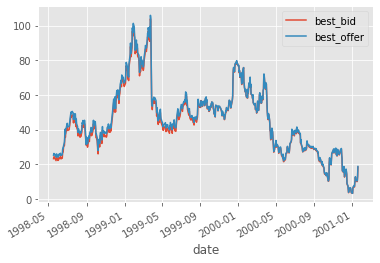

In [123]:
df_opt[df_opt.optionid==optionid][['best_bid', 'best_offer']].plot()

# Scratch

In [126]:
# ticker = df_names[df_names.secid==secid].ticker.values[0].decode()
yticker = yf.Ticker(ticker, session=session)
hist_earn = yticker.get_earnings_history()
hist_earn['Earnings Date'] = pd.to_datetime(hist_earn['Earnings Date'].str.slice(None, -3), format="%b %d, %Y, %I %p")
hist_earn
# df_names.secid

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,MSFT,Microsoft Corp,2023-04-24 06:00:00,NaN,NaN,NaN
1,MSFT,Microsoft Corp,2023-01-23 05:00:00,NaN,NaN,NaN
2,MSFT,Microsoft Corp,2022-10-24 06:00:00,NaN,NaN,NaN
3,MSFT,Microsoft Corp,2022-07-25 06:00:00,2.30,NaN,NaN
4,MSFT,Microsoft Corporation,2022-04-26 12:00:00,2.19,2.22,+1.6
...,...,...,...,...,...,...
95,MSFT,Microsoft Corporation,1999-07-19 00:00:00,0.18,0.20,+12.03
96,MSFT,Microsoft Corporation,1999-04-20 00:00:00,0.16,0.19,+21.78
97,MSFT,Microsoft Corporation,1999-01-19 00:00:00,0.15,0.18,+23.47
98,MSFT,Microsoft Corporation,1998-10-20 00:00:00,0.12,0.14,+13.84


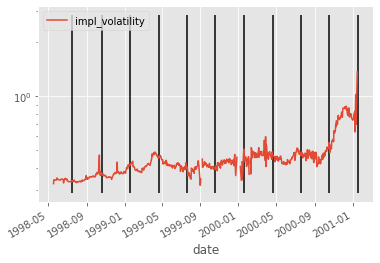

In [128]:
df_opt[['impl_volatility']].plot(logy=True)

ylim = plt.ylim()
for e in hist_earn['Earnings Date']:
    if (e>=df_opt.index[0]) and (e<=df_opt.index[-1]):
        plt.vlines(e, *ylim)